# Prepare Dataset

In [44]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras.layers import Dense
import matplotlib.pylab as plt

In [4]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

In [5]:
len(XT)

25000

In [8]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [10]:
print(word_idx.items())

ig', 18496), ('rid', 3764), ('rib', 23368), ('ric', 40761), ('ethnicity', 16502), ('blackwood', 14350), ("what'", 88186), ('ignacio', 88187), ('lengthy', 4670), ('yidische', 88188), ('eames', 88189), ('lengths', 11571), ('bacula', 88191), ("'certain", 88192), ('ideologies', 18497), ('propping', 51872), ('chicory', 88193), ('hester', 88194), ('apeal', 88195), ('minis', 27611), ('novelizations', 88196), ('devgn', 88197), ('targetting', 88198), ('brooding', 6040), ('moving', 725), ('incapacitated', 30665), ('uneasily', 88199), ('obit', 88200), ('noodle', 14351), ('castigates', 88201), ("shame's", 51873), ('solemnity', 34654), ('antoniette', 88202), ('limbaugh', 88203), ('abrasive', 17142), ('analysis', 4759), ('solids', 88204), ('castigated', 88205), ('broods', 34655), ('starved', 13415), ('huggie', 88206), ("'rangi", 88207), ('silvestres', 88208), ('bankrolls', 88209), ('reincarnates', 88210), ('misguiding', 88211), ('orientalism', 88212), ('trickle', 37476), ('mysteriosity', 88213), ('b

In [11]:
idx_word = dict([val,key] for (key,val) in word_idx.items())

In [12]:
print(idx_word)

'fcker', 88152: 'gravestones', 23366: 'freshmen', 34646: 'formatted', 88153: 'drooping', 76033: 'zelig', 88154: 'yakusyo', 82057: 'lunceford', 88155: 'editorializing', 34647: 'plywood', 88156: 'banalities', 30536: 'nestor', 64826: 'revitalizes', 40752: 'voguing', 21666: 'sedate', 51857: 'dictum', 88157: 'brasher', 779: 'york', 88158: 'unchallengeable', 88159: 'subtelly', 8772: 'opposition', 88160: 'fetchingly', 70076: "'secrets", 88161: 'appearance\x85', 88162: 'teleflick', 19481: 'viennese', 10076: 'orphanage', 40753: 'movers', 27605: "cameraman's", 88163: "cameraman't", 88164: 'pornoes', 51858: 'embodiments', 88165: 'heorine', 16105: 'fraternity', 88166: "'procedures'", 656: 'finds', 88167: 'caratherisic', 27606: 'munshi', 20584: 'clashing', 40754: "mjh's", 88168: 'lärm', 76037: 'nikah', 51859: 'incandescent', 51860: 'stowing', 51861: 'acrid', 25213: 'eyewitness', 24001: 'maniacally', 51863: 'suspenders', 57060: 'acupat', 11582: 'nominee', 23367: 'toshiro', 51864: "'anita", 25214: 'c

In [15]:
actual_review = ' '.join(idx_word.get(idx-3,'#') for idx in XT[0])

In [16]:
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [27]:
def vectorize_sentences(sentences,dim=10000):
    output = np.zeros((len(sentences),dim))
    for i,idx in enumerate(sentences):
        output[i,idx] = 1
    return output

In [29]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [31]:
X_train.shape

(25000, 10000)

In [32]:
X_test.shape

(25000, 10000)

In [33]:
Y_train = np.asarray(YT).astype('float32')

In [34]:
Y_test = np.asarray(Yt).astype('float32')

# Build Neural Network and create model

In [64]:
model = models.Sequential()
model.add(Dense(16,input_shape=(10000,),activation='relu'))

In [65]:
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and Validation

In [68]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]

In [69]:
Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [70]:
hist = model.fit(X_train_new,Y_train_new,epochs=4,batch_size=512,validation_data=(X_val,Y_val))

Epoch 1/4
40/40 [==============================] - 2s 33ms/step - loss: 0.5777 - accuracy: 0.6918 - val_loss: 0.3797 - val_accuracy: 0.8594
Epoch 2/4
40/40 [==============================] - 1s 17ms/step - loss: 0.3006 - accuracy: 0.9028 - val_loss: 0.2871 - val_accuracy: 0.8892
Epoch 3/4
40/40 [==============================] - 1s 17ms/step - loss: 0.2112 - accuracy: 0.9296 - val_loss: 0.2778 - val_accuracy: 0.8892
Epoch 4/4
40/40 [==============================] - 1s 17ms/step - loss: 0.1687 - accuracy: 0.9444 - val_loss: 0.3409 - val_accuracy: 0.8670


In [71]:
h = hist.history

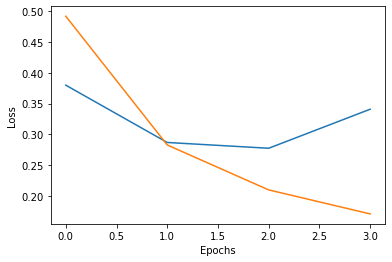

In [72]:
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

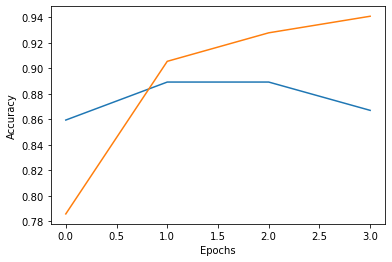

In [73]:
plt.plot(h['val_accuracy'],label='Validation Accuracy')
plt.plot(h['accuracy'],label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [74]:
model.evaluate(X_test,Y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3712 - accuracy: 0.8521


[0.3711918890476227, 0.8520799875259399]

In [75]:
model.predict(X_test)

array([[0.12159026],
       [0.9959192 ],
       [0.19405091],
       ...,
       [0.06278074],
       [0.05280232],
       [0.33510756]], dtype=float32)